In [ ]:
%pip install scikit-learn

In [1]:
# example of creating a test dataset
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create the inputs and outputs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)


In [3]:
x1 = X[:,0]
x2 = X[:,1]

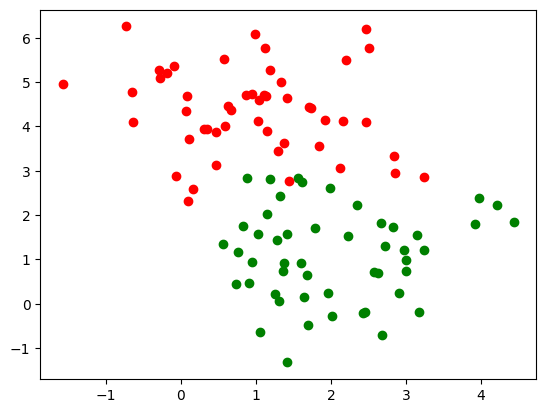

In [4]:

blo = np.zeros((len(y),2))
red = np.zeros((len(y),2))
for i in range(len(y)):
    if y[i] == 1:
        blo[i] = X[i]
    else:
        red[i] = X[i]

def del_zro(matrix):
    ze = [0, 0]
    mask = np.all(matrix != ze, axis=1)
    return matrix[mask]

bl1 = del_zro(blo)[:,0]
bl2 = del_zro(blo)[:,1]

re1 = del_zro(red)[:,0]
re2 = del_zro(red)[:,1]

plt.plot(bl1, bl2, 'go')
plt.plot(re1, re2, 'ro')
plt.show()



In [5]:
def Z(w1, w2, b):
    def sm(w , x):
        pars = 0
        for l in range(len(w)):
            if w[l] is not None:
                par = w[l] * (x ** (l + 1))
                pars += par
            else:
                pass
        return pars
    return np.array(sm(w1, x1) + sm(w2, x2) + b)
def f(Z):
    fz = 1 / (1 + np.exp(-Z))
    return fz

def J(w1, w2, b):
    j = -(np.sum(y*np.log(f(Z(w1, w2, b))) + (1-y)*np.log(1 - f(Z(w1, w2, b))))) / len(y)
    return j

def jdW(w1, w2, b):
    ws1 = np.zeros(len(w1))
    ws2 = np.zeros(len(w2))
    def Ws(w, x, ws):
        for u in range(len(w)):
            if w[u] is not None:
                dw = float(np.sum((f(Z(w1, w2, b)) - y)*x**(u+1))/len(y))
                ws[u] = dw
            else:
                pass
        return ws
    return np.array([Ws(w1, x1, ws1), Ws(w2, x2, ws2)])

def jdb(w1, w2, b):
    db = float(np.sum((f(Z(w1, w2, b)) - y))/len(y))
    return db

In [16]:
alfa = 0.01
rp = 790
ww = np.zeros((2,2))
b = 0
jj = np.zeros(rp)
for i in range(rp):
    ww = ww - alfa * jdW(ww[:,0], ww[:,1], b)
    b = b - alfa * jdb(ww[:,0], ww[:,1], b)
    jj[i] = J(ww[:,0], ww[:,1], b)

w1 = ww[:,0]
w2 = ww[:,1]

print(f'''w1: {w1}
w2: {w2}
b: {b}''')
print(jj[-1])

#0.17639551390694602

w1: [ 1.10136568 -0.21014148]
w2: [ 2.30367138 -1.00626688]
b: 0.5511610369598067
0.17639551390694602


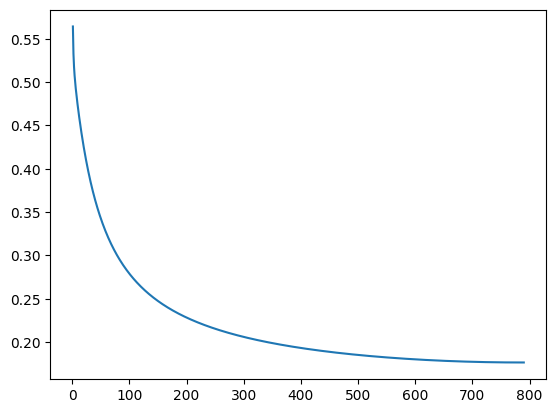

In [17]:
a = np.arange(1, rp+1)
plt.plot(a, jj)
plt.show()

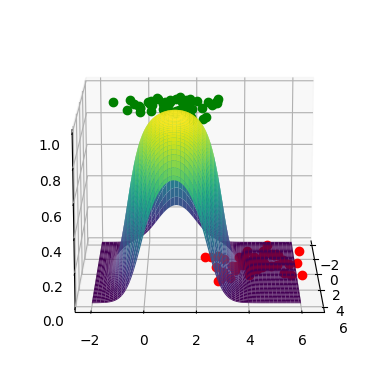

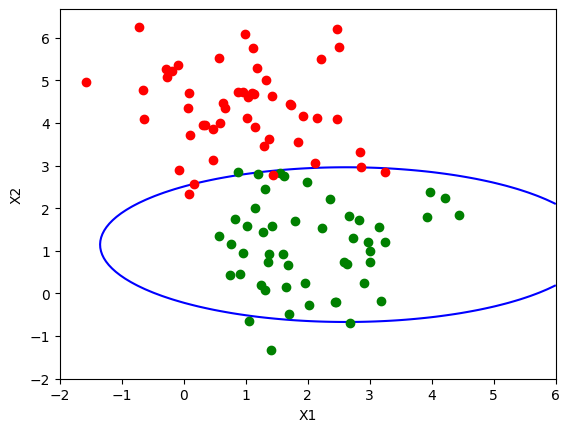

In [18]:
xf1 = np.linspace(-2, 6, 100)
xf2 = np.linspace(-2, 6, 100)
X1, X2 = np.meshgrid(xf1, xf2)
def z(X1, X2):
    def sm(w , xf):
        pars = 0
        for l in range(len(w)):
            if w[l] is not None:
                par = w[l] * (xf ** (l + 1))
                pars += par
            else:
                pass
        return pars
    return sm(w1, X1) + sm(w2, X2) + b
def g(z):
    f = 1 / (1 + np.exp(-z))
    return f

g = g(z(X1, X2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# fig = plt.figure()
# ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, g, cmap='viridis')
ax.view_init(elev=15, azim=0)

ax.plot(bl1, bl2, 1, 'go')
ax.plot(re1, re2, 0, 'ro')

plt.show()

# z1 = z(X1, X2)
# plt.contour(X1, X2, z1, [b], colors='b')


plt.contour(X1, X2, g, [0.5], colors='b')

plt.plot(bl1, bl2, 'go')
plt.plot(re1, re2, 'ro')

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

# plt.plot(bl1, bl2, 'go')
# plt.plot(re1, re2, 'ro')
# plt.show()

